In [1]:
import torch
import torchvision.datasets as datasets
from torchmetrics.image.fid import FrechetInceptionDistance
import torchvision.transforms as transforms

## MNIST PICTURES

In [2]:
MNIST_pictures = datasets.MNIST(root = './data', train = True, download=True);

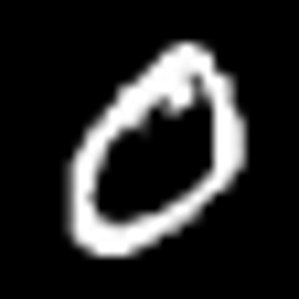

In [3]:
image, target = MNIST_pictures[1]
factor = 299/28
image = image.resize((299,299))
image

In [4]:
def compute_FID(image_r, image_f):
    _ = torch.manual_seed(123)
    fid = FrechetInceptionDistance(feature=64)
    fid.update(image_r, real=True)
    fid.update(image_f, real=False)
    FID = fid.compute()
    return FID

In [5]:
# imgs_dist1 = torch.randint(0, 200, (100, 3, 299, 299), dtype=torch.uint8)
# imgs_dist2 = torch.randint(100, 255, (100, 3, 299, 299), dtype=torch.uint8)
# compute_FID(imgs_dist1, imgs_dist2)

In [6]:
def encode_image(img):
    transform = transforms.Compose([transforms.PILToTensor()])
    return transform(img)

encoded = encode_image(image)

In [7]:
encoded = encoded.expand([100, 3, 299, 299])
# compute_FID(encoded, encoded)
compute_FID(encoded, encoded)

tensor(-1.0863e-12)

#### Increasing Contrast

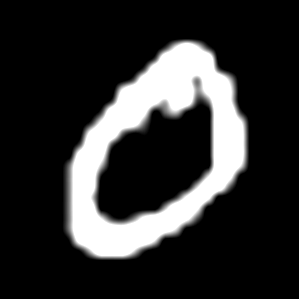

In [50]:
from PIL import ImageEnhance
enhancer = ImageEnhance.Contrast(image)
factor = 2
contrst_im = enhancer.enhance(factor)
contrst_im

In [51]:
contrst_encoded=encode_image(contrst_im)
contrst_encoded = contrst_encoded.expand([100, 3, 299, 299])
compute_FID(encoded, contrst_encoded)

tensor(0.2107)

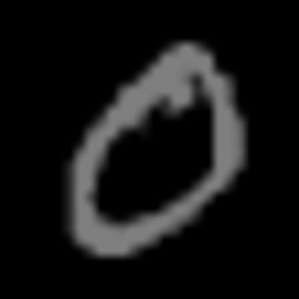

In [52]:
enhancer = ImageEnhance.Brightness(image)
factor = 0.5
bright_im = enhancer.enhance(factor)
bright_im

In [11]:
bright_encoded=encode_image(bright_im)
bright_encoded = bright_encoded.expand([100, 3, 299, 299])
compute_FID(encoded, bright_encoded)

tensor(0.7154)

## CIFAR

In [43]:
CIFAR = datasets.CIFAR100(root = './data', train = True, download=True);

Files already downloaded and verified


In [44]:
cifar_im, size = CIFAR[2198]

In [45]:
cifar_encoded = encode_image(cifar_im)
cifar_encoded = cifar_encoded.expand([100, 3, 32, 32])

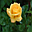

In [48]:
enhancer = ImageEnhance.Sharpness(cifar_im)
factor = 3
new_cifar = enhancer.enhance(factor)
new_cifar

In [49]:
encoded_new = encode_image(new_cifar)
encoded_new = encoded_new.expand([100, 3, 32, 32])
compute_FID(cifar_encoded, encoded_new)

tensor(0.5046)

In [54]:
image, target = MNIST_pictures[1]
image

In [56]:
iamge, target = MNIST_pictures[3]
iamge

In [57]:
iamge_enc = encode_image(iamge)

In [58]:
image_enc = encode_image(image)

In [61]:
image_enc = image_enc.expand([100, 3, 28, 28])
iamge_enc = iamge_enc.expand([100, 3, 28, 28])

In [62]:
compute_FID(image_enc, iamge_enc)

tensor(0.8329)

In [ ]:
MNIST_pictures